### Задание
необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
happiness = pd.read_csv('2019.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# смотрим информацию
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

#### Строим График
Зависимость ранга счастья от ВВП

Text(0, 0.5, 'Показатель')

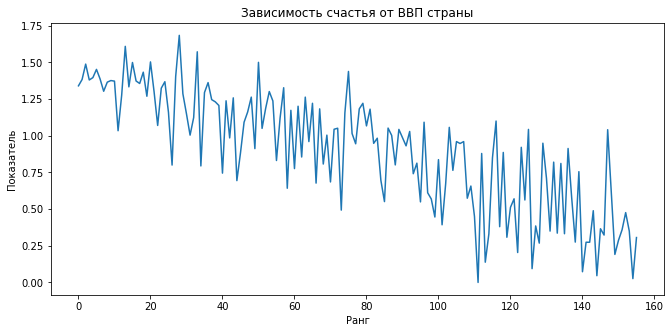

In [5]:
plt.plot(happiness.index, happiness['GDP per capita'])
plt.title('Зависимость счастья от ВВП страны')
plt.xlabel('Ранг')
plt.ylabel('Показатель')

##### интерпритация
В целом в странах с более высоким ВВП уровень счастья выше, но с 100-го места явной зависимости от ВВП уже не наблюдается. То есть данный параметр влияет на уровень счатья жителей страны, но не является основополагающим. 

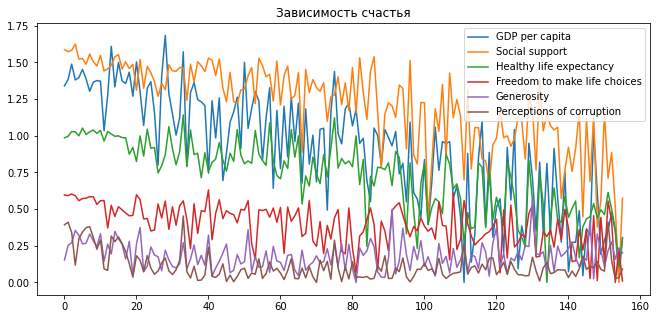

In [6]:
happiness[['GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].plot(title='Зависимость счастья') 
plt.xlabel=('Ранг')
plt.ylabel=('Показатель')

##### интерпритация
Меньше всего на уровень счастья оказывает влияние "Generosity" (Щедрость) и "Perceptions of corruption" (Восприятие коррупции). Чуть значительнее влияние от параметра "Freedom to make life choices" (Свобода делать выбор). Данные параметры в целом по всем рассматриваемым странам одинаковы.
Наибольшие влияние оказывают на счастье граждан такие показатели как ВВП, семья и продолжительность жизни. 

#### Гистограмма

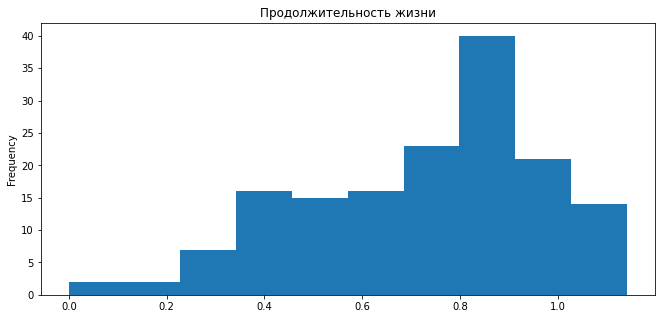

In [7]:
# Распределение оценок всех стран на параметр Продолжительность жизни
happiness['Healthy life expectancy'].plot(kind='hist', 
                                          title='Продолжительность жизни',
                                          xlabel='Показатель',
                                          ylabel='')

Наибольшее количество пользователей ставило зависимость счастья от продолжительности жизни от 0,8 до 1,0

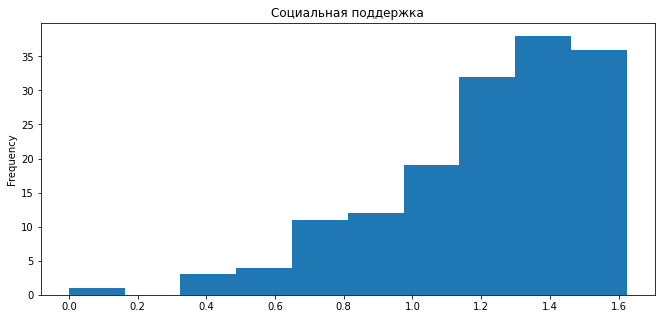

In [8]:
# Распределение оценок всех стран на параметр Социальная поддержка
happiness['Social support'].plot(kind='hist', 
                                          title='Социальная поддержка',
                                          xlabel='Показатель',
                                          ylabel='')

Социальная поддержка важна для большинства респондентов

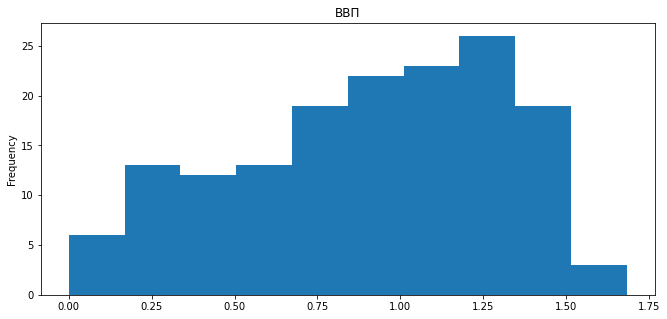

In [9]:
# Распределение оценок всех стран на параметр ВВП
happiness['GDP per capita'].plot(kind='hist', 
                                          title='ВВП',
                                          xlabel='Показатель',
                                          ylabel='')

Показатель ВВП более равномерно распределен, но для большинства респондентов важен (больше половины). Очень значим данный параметр для очень незначительного количества человек.

####Boxplot

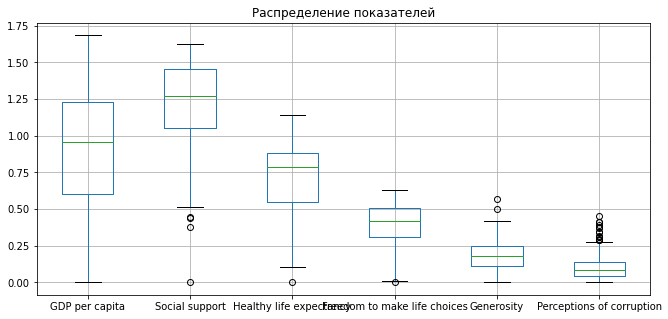

In [10]:
happiness[['GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].plot(kind='box',
                                                                                                                                                        title='Распределение показателей', grid=True)

Наиболее сглажено распределены оценки по параметру ВВП.  Респонденты по параметру Соц.поддержка меньше ставили низких оценок, то есть данный параметр важен для общего уровня счастья. Аналогичная ситуация с параметрамии "Продолжительность жизни" и "Свобода выбора". По параметру "Коррупция" больше ставили низкие оценки, то есть данный параметр для общего уровня "Счастья" не значителен.

### Библиотека seaborn

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Зависимость счастья от показателья Социальная поддержка')

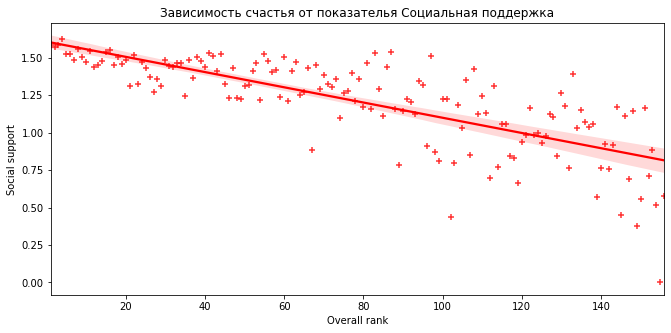

In [16]:
sns.regplot(data=happiness, x='Overall rank', y='Social support', color='red', marker='+')
plt.title('Зависимость счастья от показателья Социальная поддержка')

Чем выше уровень Социальная поддержка, тем выше по рангу Счастья находится страна.

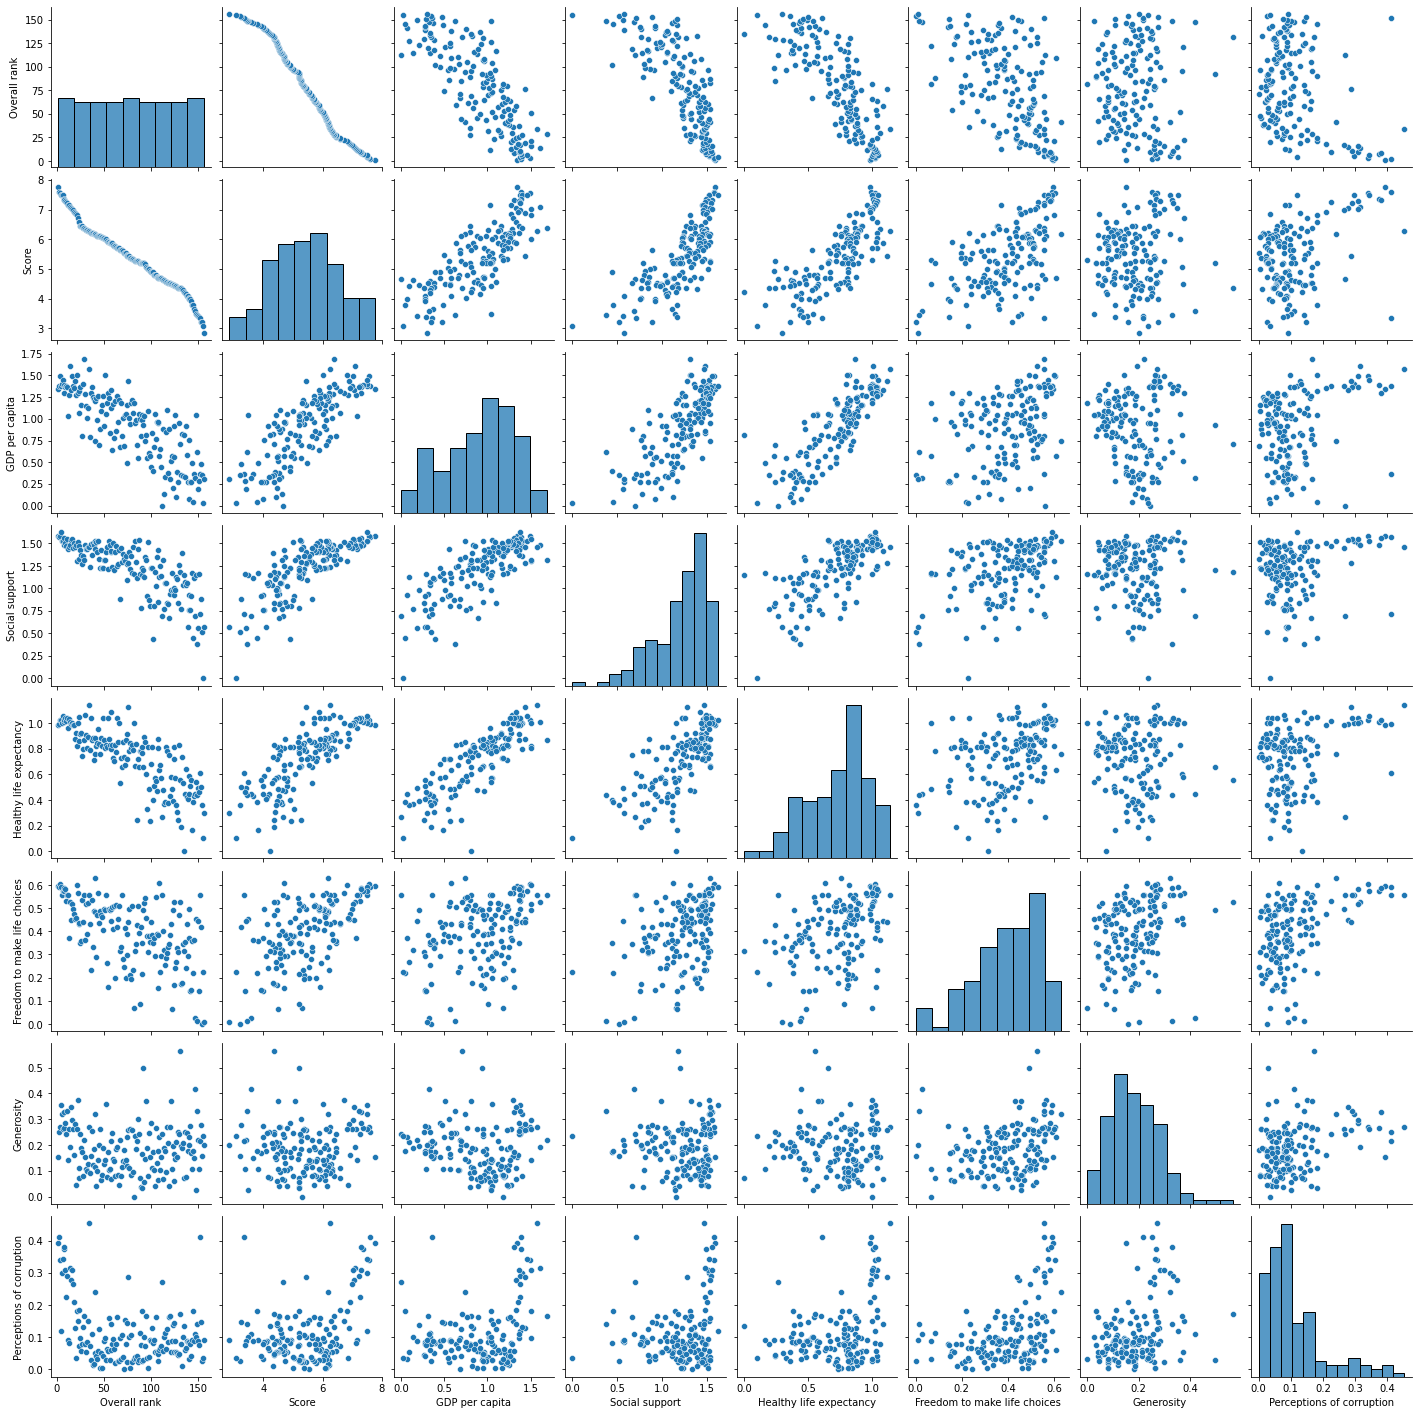

In [17]:
sns.pairplot(happiness)